In [3]:
import numpy as np
import torch

# Linear Regression

## data

In [4]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

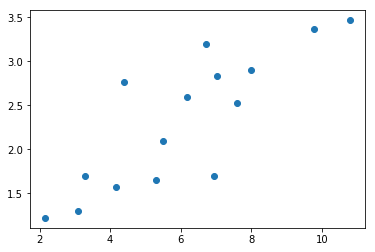

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_train, y_train, 'o')

In [18]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

## model

In [19]:
import torch.nn as nn

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1,1)
    
    def forward(self, x):
        out = self.linear(x)
        return out
    
model = LinearRegression()

### 定义loss和optimizer

In [20]:
from torch import optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

## train

In [21]:
from torch.autograd import Variable

num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)
    
    # forward
    out = model(inputs) # forward
    loss = criterion(out, target) # calculate loss
    
    # backward
    optimizer.zero_grad() # grad zero
    loss.backward() # direction background
    optimizer.step() # update parameter
    
    if (epoch+1)%20 == 0:
        print('Epoch[{}/{}]. loss: {:.6f}'.format(epoch+1, num_epochs, loss.data[0]))

Epoch[20/1000]. loss: 0.570796
Epoch[40/1000]. loss: 0.474146
Epoch[60/1000]. loss: 0.405817
Epoch[80/1000]. loss: 0.357504
Epoch[100/1000]. loss: 0.323338
Epoch[120/1000]. loss: 0.299169
Epoch[140/1000]. loss: 0.282067
Epoch[160/1000]. loss: 0.269958
Epoch[180/1000]. loss: 0.261378
Epoch[200/1000]. loss: 0.255293
Epoch[220/1000]. loss: 0.250970
Epoch[240/1000]. loss: 0.247894
Epoch[260/1000]. loss: 0.245698
Epoch[280/1000]. loss: 0.244125
Epoch[300/1000]. loss: 0.242992
Epoch[320/1000]. loss: 0.242169
Epoch[340/1000]. loss: 0.241566
Epoch[360/1000]. loss: 0.241119
Epoch[380/1000]. loss: 0.240781
Epoch[400/1000]. loss: 0.240521
Epoch[420/1000]. loss: 0.240316
Epoch[440/1000]. loss: 0.240150
Epoch[460/1000]. loss: 0.240011
Epoch[480/1000]. loss: 0.239891
Epoch[500/1000]. loss: 0.239786
Epoch[520/1000]. loss: 0.239690
Epoch[540/1000]. loss: 0.239601
Epoch[560/1000]. loss: 0.239516
Epoch[580/1000]. loss: 0.239436
Epoch[600/1000]. loss: 0.239357
Epoch[620/1000]. loss: 0.239281
Epoch[640/10

In [22]:
optimizer.zero_grad()

## validation 

In [40]:
model.eval()
predict = model(Variable(x_train))
predict = predict.data.numpy()

In [41]:
predict

array([[ 1.22413218],
       [ 1.62480211],
       [ 2.02547193],
       [ 2.46620893],
       [ 2.54634285],
       [ 1.54029727],
       [ 3.58407807],
       [ 2.2738874 ],
       [ 2.78674483],
       [ 0.81144226],
       [ 2.58713818],
       [ 3.95269442],
       [ 1.95735824],
       [ 2.93499279],
       [ 1.15128314]], dtype=float32)

In [44]:
np.shape(x_train.numpy())

(15, 1)

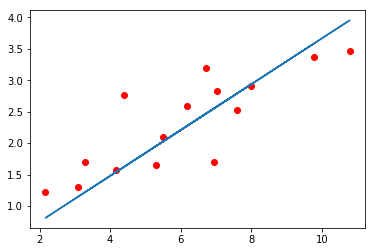

In [54]:
plt.plot(x_train.numpy(), y_train.numpy(), 'ro')
plt.plot(x_train.numpy(), predict)